In [1]:
# importing all important libraries for the task
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from libsvm.svmutil import *
from scipy.spatial.distance import cdist
from sklearn.metrics import f1_score,confusion_matrix

In [2]:
# defining the get kernel SVM function
def getKernelSVMSolution(Xtr, Ytr, C, G, Xts, Yts):
    # creating the model
    model=svm_train(svm_problem(Ytr, Xtr), svm_parameter('-t 2 -g '+str(G)+' -c '+str(C)+' -b 1 -q'))
    
    # predicting through the model
    L,A,V=svm_predict(Yts,Xts,model,'-b 1')
    distance = [(L[i]*V[i][int((abs(int(L[i]))-int(L[i]))/2)]) for i in range(len(L))]
    
    # returnig the labels
    return L,distance

In [3]:
# converting the matrix to Dictionaries to pass in the onevsone and onevsrest schemes
def convertToDict(X):
    return [{x+1:y[0,x] for x in range(y.shape[1]) if y[0,x]!=0} for y in X]

In [4]:
# loading training data
X_train=convertToDict(np.matrix(np.loadtxt('USPSTrain.csv',delimiter=',')))

In [5]:
# loading training labels
y_train=np.loadtxt('USPSTrainlabel.csv',delimiter=',')
y_train

array([6., 5., 4., ..., 9., 0., 1.])

In [6]:
# loading test data
X_test=convertToDict(np.matrix(np.loadtxt('USPSTest.csv',delimiter=',')))

In [7]:
# loading test labels
y_test=np.loadtxt('USPSTestlabel.csv',delimiter=',')
y_test

array([9., 6., 3., ..., 4., 0., 1.])

In [8]:
# defining onevsone scheme function
def onevsone(Xtr, Ytr, C, Xts, Yts):
    
    # tostore the predictions
    Prediction=[]
    # to store the labels
    Label=[]
    
    # this will total run 45 times as n=10, hence (n*(n-1))/2=45
    for i in range(10):
        for j in range(10):
            if(i>=j):
                continue
            else:
                #will store training data
                X=[]
                # will store 1 and -1 values
                Y=[]
                
                # loop for getting the binary modified data
                for r in range(len(Ytr)):
                    if i==Ytr[r]:
                        X.append(Xtr[r])
                        Y.append(1)
                    elif j==Ytr[r]:
                        X.append(Xtr[r])
                        Y.append(-1)
                
                # finding the median
                M=np.median(cdist(pd.DataFrame(X).fillna(0).values, pd.DataFrame(X).fillna(0).values)[np.triu_indices(pd.DataFrame(X).fillna(0).values.shape[0],1)])**2
                
                # appending the labels we got from the SVM in the prediction array created above
                Prediction.append(getKernelSVMSolution(X,Y,C,3/M,Xts,Yts)[0])
    
    # converting array to matrix
    Prediction=np.matrix(Prediction)
    for x in range(Prediction.shape[1]):
        M=np.zeros((10,10))
        M[np.triu_indices(10,1)]=Prediction[:,x].T 
        mapping={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
        for r in range(M.shape[0]):
            for c in range(M.shape[1]):
                if(M[r,c]>0):
                    mapping[r]=mapping[r]+1
                elif(M[r,c]<0):
                    mapping[c]=mapping[c]+1
        Label.append([x for x in mapping.keys() if mapping[x]==max(mapping.values())][0]) #maximum mapping key
    return Label

In [9]:
# start time of onevs one
start_time_onevsone=time.time()

# running onevs one scheme
onevsone=onevsone(X_train,y_train,100,X_test,y_test)

# end time of onevsone scheme
onevsone_runtime=time.time()

Accuracy = 0.199302% (4/2007) (classification)
Accuracy = 0.0996512% (2/2007) (classification)
Accuracy = 0.398605% (8/2007) (classification)
Accuracy = 0.249128% (5/2007) (classification)
Accuracy = 0.149477% (3/2007) (classification)
Accuracy = 0.249128% (5/2007) (classification)
Accuracy = 0.597907% (12/2007) (classification)
Accuracy = 0.149477% (3/2007) (classification)
Accuracy = 0.498256% (10/2007) (classification)
Accuracy = 12.855% (258/2007) (classification)
Accuracy = 12.855% (258/2007) (classification)
Accuracy = 12.5561% (252/2007) (classification)
Accuracy = 12.5062% (251/2007) (classification)
Accuracy = 12.7055% (255/2007) (classification)
Accuracy = 12.6557% (254/2007) (classification)
Accuracy = 12.5561% (252/2007) (classification)
Accuracy = 12.6557% (254/2007) (classification)
Accuracy = 12.7554% (256/2007) (classification)
Accuracy = 0.498256% (10/2007) (classification)
Accuracy = 12.9547% (260/2007) (classification)
Accuracy = 5.8296% (117/2007) (classification)
A

In [10]:
print("OnevsOne Scheme:-")
confusion_matrix(y_test,onevsone)

OnevsOne Scheme:-


array([[355,   0,   2,   0,   1,   0,   0,   0,   0,   1],
       [  0, 249,   2,   0,   6,   0,   4,   2,   1,   0],
       [  4,   0, 177,   4,   4,   2,   0,   1,   6,   0],
       [  1,   0,   3, 153,   0,   6,   0,   0,   2,   1],
       [  0,   1,   3,   0, 187,   1,   2,   2,   2,   2],
       [  4,   0,   0,  10,   1, 143,   0,   0,   0,   2],
       [  4,   0,   3,   0,   3,   2, 156,   0,   2,   0],
       [  0,   0,   2,   0,   5,   0,   0, 138,   1,   1],
       [  1,   0,   2,   3,   0,   5,   0,   0, 151,   4],
       [  0,   2,   0,   0,   3,   1,   0,   3,   2, 166]], dtype=int64)

In [11]:
print("OnevsOne F1_score:- ")
f1_score(y_test,onevsone,average="macro")

OnevsOne F1_score:- 


0.9286610209080213

In [12]:
print('Runtime for onevsone:- ',onevsone_runtime-start_time_onevsone)

Runtime for onevsone:-  39.093419551849365


In [13]:
# defining function for onevsrest scheme
def onevsrest(Xtr,Ytr,C,Xts,Yts):
    
    # store the predictions
    Prediction=[]
    
    # store the labels
    Label=[]
    
    for i in range(10):
        # will store training data
        X=[]
        # will store -1 and 1 values
        Y=[]
        
        # creating the binary modified data
        for r in range(len(Ytr)):
            if(i==Ytr[r]):
                X.append(Xtr[r])
                Y.append(1)
            else:
                X.append(Xtr[r])
                Y.append(-1)
                
        # finding the median
        M=np.median(cdist(pd.DataFrame(X).fillna(0).values, pd.DataFrame(X).fillna(0).values)[np.triu_indices(pd.DataFrame(X).fillna(0).values.shape[0],1)])**2        
        
        # predicting the labels using the SVM function and appending the predictions into the array created above
        Prediction.append(getKernelSVMSolution(X,Y,C,3/M,Xts,Yts)[1])
    
    # converting array into the matrix
    Prediction=np.matrix(Prediction)

    for x in range(Prediction.shape[1]):
        mapping = {i:Prediction[i,x] for i in range(10)}
        Label.append([x for x in mapping.keys() if mapping[x]==max(mapping.values())][0])
    return Label

In [14]:
# start time of onevsrest
start_time_onevsrest=time.time()

# running the onevsrest function
onevsrest=onevsrest(X_train,y_train,100,X_test,y_test)

# end time for onevsrest
onevsrest_runtime=time.time()

Accuracy = 0% (0/2007) (classification)
Accuracy = 12.4564% (250/2007) (classification)
Accuracy = 0% (0/2007) (classification)
Accuracy = 0% (0/2007) (classification)
Accuracy = 0.249128% (5/2007) (classification)
Accuracy = 0% (0/2007) (classification)
Accuracy = 0.199302% (4/2007) (classification)
Accuracy = 0% (0/2007) (classification)
Accuracy = 0% (0/2007) (classification)
Accuracy = 0% (0/2007) (classification)


In [15]:
print('Runtime for onevsrest:- ',onevsrest_runtime-start_time_onevsrest)

Runtime for onevsrest:-  55.984233140945435


In [16]:
print("OnevsRest Scheme:-")
confusion_matrix(y_test,onevsrest)

OnevsRest Scheme:-


array([[355,   0,   2,   0,   1,   0,   0,   0,   0,   1],
       [  0, 252,   1,   0,   6,   0,   3,   2,   0,   0],
       [  4,   0, 178,   3,   5,   0,   0,   2,   6,   0],
       [  3,   0,   5, 148,   0,   6,   0,   1,   2,   1],
       [  0,   1,   5,   0, 185,   2,   2,   2,   0,   3],
       [  4,   0,   1,   7,   1, 146,   0,   0,   0,   1],
       [  2,   0,   3,   0,   3,   2, 158,   0,   2,   0],
       [  0,   0,   1,   0,   5,   0,   0, 140,   0,   1],
       [  3,   0,   3,   3,   0,   5,   0,   1, 150,   1],
       [  0,   1,   0,   0,   3,   1,   0,   4,   2, 166]], dtype=int64)

In [17]:
print("OnevsRest F1_score:- ")
f1_score(y_test,onevsrest,average="macro")

OnevsRest F1_score:- 


0.9304884595830402

In [36]:
# defining a function to plot the mismatched images
def mismatched_images(X,Y,P,t):
    C=0
    L=[]
    for i in range(len(Y)):
        if(Y[i]!=P[i]):
            C=C+1
            L.append(i)
    w=int(pow(C,0.5))+1
    c=0
    f,a=plt.subplots(w,w)
    for i in range(w):
        for j in range(w):
            if(C<=c):
                a[i,j].axis('off')
                continue
            a[i,j].imshow(X[L[c],:].reshape(16,16), cmap='gray')
            plt.subplots_adjust(wspace=1.8)
            c=c+1
    plt.suptitle(t+str(C), fontsize=13)

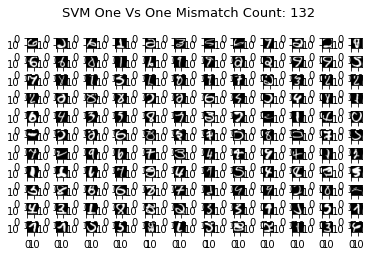

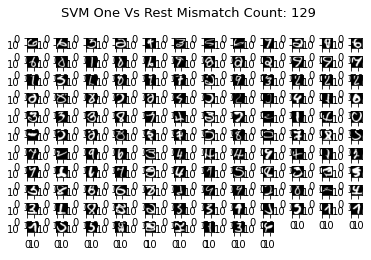

In [37]:
# plotting the mismatched images of onevsone
mismatched_images(np.loadtxt('USPStest.csv', delimiter=','),y_test,onevsone,'SVM One Vs One Mismatch Count: ')

# plotting the mismatched images of onevsrest
mismatched_images(np.loadtxt('USPStest.csv', delimiter=','),y_test,onevsrest,'SVM One Vs Rest Mismatch Count: ')
plt.show()

In [20]:
# storing the predicted values on onevsone in a text file
PredOneVersusOne=np.savetxt("PredOneVersusOne.txt", np.array(onevsone), newline="\n")

In [21]:
# storing the predicted values on onevsrest in a text file
PredOneVersusRest=np.savetxt("PredOneVersusRest.txt", np.array(onevsrest), newline="\n")